In [117]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import sklearn 
import statsmodels as sm
%matplotlib inline
from sklearn import tree
from sklearn import datasets

In [118]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

### Importing Dataset

In [119]:
iris = pd.read_csv("Downloads/Iris.csv")

In [120]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Information about Dataset

In [121]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [122]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Summary

In [123]:
iris.select_dtypes('float64').apply(continuous_var_summary)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
N,150.000000,150.000000,150.000000,150.000000
NMISS,0.000000,0.000000,0.000000,0.000000
SUM,876.500000,458.100000,563.800000,179.800000
MEAN,5.843333,3.054000,3.758667,1.198667
MEDIAN,5.800000,3.000000,4.350000,1.300000
STD,0.828066,0.433594,1.764420,0.763161
VAR,0.685694,0.188004,3.113179,0.582414
MIN,4.300000,2.000000,1.000000,0.100000
P1,4.400000,2.200000,1.149000,0.100000
P5,4.600000,2.345000,1.300000,0.200000


In [116]:
#iris.drop(['Id'], axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C1E2268B00>,
      dtype=object)

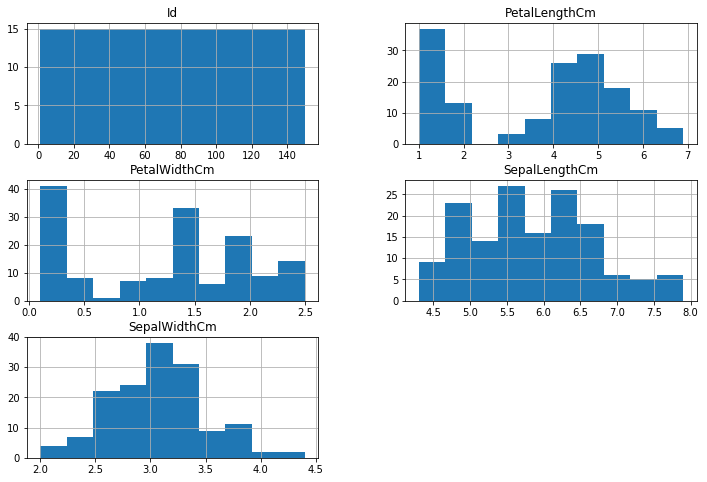

In [124]:
iris.hist(figsize=(12,8))

### Defining Decision Tree Algorithm

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score , confusion_matrix

In [126]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [127]:
X= iris.iloc[:,1:-1]
y= iris.iloc[:,-1]

### Splitting Data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=42)

### Initialize and Build the Model

In [129]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)


In [130]:
model = DecisionTreeClassifier (max_depth=5 , criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predict the values

In [131]:
y_pred = model.predict(X_test)

In [132]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)
                               

In [133]:
df = pd.DataFrame({'Actual' : y_test , 'Predicted' : y_pred})
df.head()

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor


### accuracy score for the training and testing

In [134]:
print('Train Accuracy: ', metrics.accuracy_score(y_train, y_train_predict))
print('Test Accuracy: ', metrics.accuracy_score(y_test, y_test_predict))

Train Accuracy:  0.99
Test Accuracy:  0.98


### Confusion metrix for test data

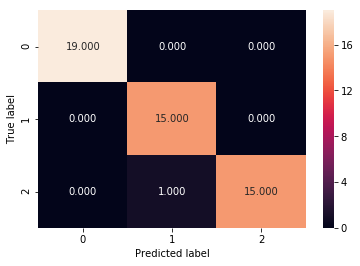

In [135]:
tree_cm = metrics.confusion_matrix(y_test ,y_test_predict)
sns.heatmap(tree_cm, annot = True, fmt = '.3f')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

      micro avg       0.98      0.98      0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [137]:
print("Accuracy","{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

Accuracy 0.980


### Visualizing the Tree

In [143]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

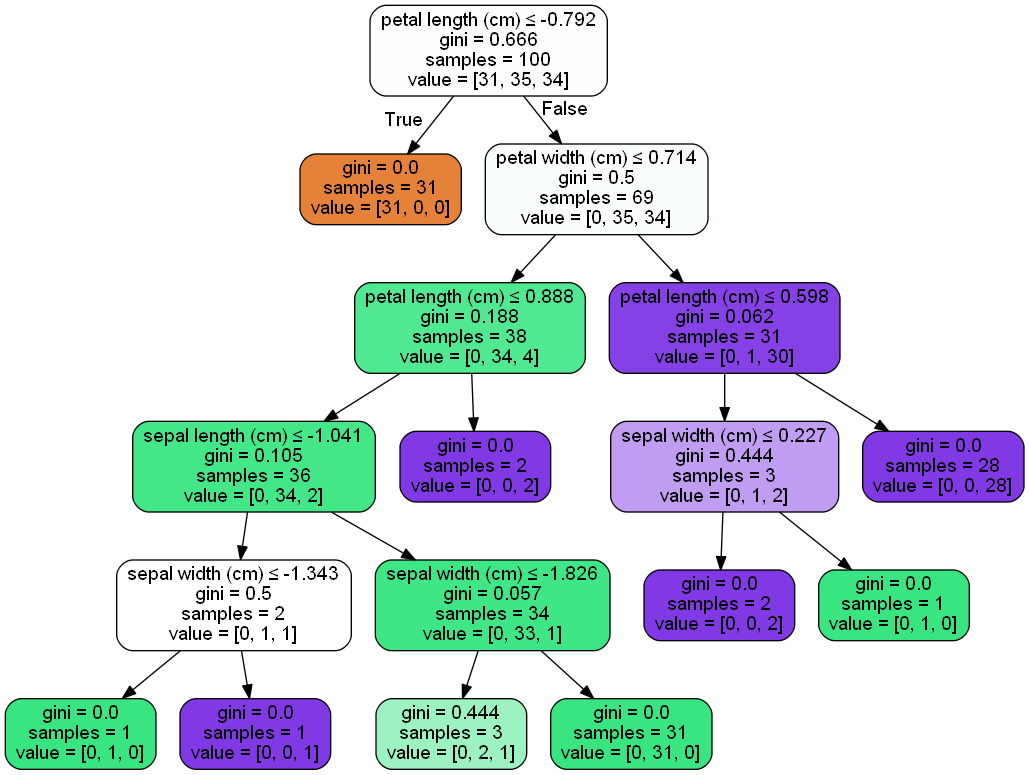

In [144]:
dot_data = StringIO()

#feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class_names = ['iris-setosa', 'iris-versicolor' , 'iris-virginica']
features_names = list(iris.columns[:4])

export_graphviz(model , out_file=dot_data , feature_names=feature_names,
               filled=True, rounded= True, special_characters=True)

graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())